Roshni Scratch Notebook

In [124]:
# Import Packages and Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

%matplotlib inline

data = pd.read_csv('data/kc_house_data.csv')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Variable Types

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [3]:
ldf = data.drop(labels = ['id', 'date'], axis=1)

df = ldf.drop(labels = ['address', 'lat', 'long', 'sqft_above'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30155 non-null  float64
 1   bedrooms       30155 non-null  int64  
 2   bathrooms      30155 non-null  float64
 3   sqft_living    30155 non-null  int64  
 4   sqft_lot       30155 non-null  int64  
 5   floors         30155 non-null  float64
 6   waterfront     30155 non-null  object 
 7   greenbelt      30155 non-null  object 
 8   nuisance       30155 non-null  object 
 9   view           30155 non-null  object 
 10  condition      30155 non-null  object 
 11  grade          30155 non-null  object 
 12  heat_source    30123 non-null  object 
 13  sewer_system   30141 non-null  object 
 14  sqft_basement  30155 non-null  int64  
 15  sqft_garage    30155 non-null  int64  
 16  sqft_patio     30155 non-null  int64  
 17  yr_built       30155 non-null  int64  
 18  yr_ren

## First Thoughts: 
* Definitely unnecessary columns = id, date (sold)
* Maybe unnecessary = address, lat, long
* Possible not that interesting: heat_source, sewer_system, Grade
* Sub-variables: sqft_above, sqft_basement (sum = sqft living)

* n = 30155
* can be a robust model (~1507 predictors with 1/20 rule of thumb)

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated
count,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,1108535.84,3.41,2.33,2112.42,16723.60,1.54,476.04,330.21,217.41,1975.16,90.92
std,896385.66,0.98,0.89,974.04,60382.60,0.57,579.63,285.77,245.30,32.07,416.47
min,27360.00,0.00,0.00,3.00,402.00,1.00,0.00,0.00,0.00,1900.00,0.00
25%,648000.00,3.00,2.00,1420.00,4850.00,1.00,0.00,0.00,40.00,1953.00,0.00
50%,860000.00,3.00,2.50,1920.00,7480.00,1.50,0.00,400.00,150.00,1977.00,0.00
75%,1300000.00,4.00,3.00,2619.50,10579.00,2.00,940.00,510.00,320.00,2003.00,0.00
max,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,8020.00,3580.00,4370.00,2022.00,2022.00


In [6]:
df.describe(include=np.object)

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system
count,30155,30155,30155,30155,30155,30155,30123,30141
unique,2,2,2,5,5,13,7,4
top,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC
freq,29636,29382,24893,26589,18547,11697,20583,25777


<AxesSubplot:>

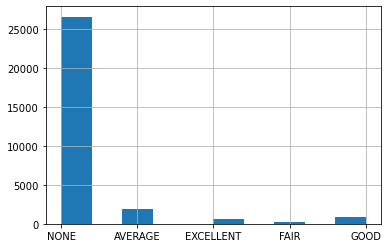

In [7]:
df['view'].hist()

# Binary makes sense since "None" more frequent than others"

## Variable Breakdown: 

### Outcome:
* price (continuous)
***

### Numeric Predictors: 
1. Sqft_living
2. Sqft_lot
3. Sqft_garage
4. Sqft_patio
5. Yr Built (1900 - 2022; range = 122)

### Categorical Ordinal Predictors: 
1. Condition (5 categories)
2. Bedrooms (13 categories; can combine 6 - 12 as 6+ for 7 categories)
3. Bathrooms (21 categories: combine 4+ into one variable for 7 categories)
4. Floors (7 categories; can combine 3+ for 5 categories)
5. Grade (13 categories: explore combo
6. Heat Source (5 categories: Gas, Oil, Electricity, SolarHybrid, Other)

### Categorical Binary Predictors:
1. Waterfront (discrete: yes/no)
2. Greenbelt (discrete: yes/no)
3. Nuisance (discrete: yes/no)
4. Year Renovated (**CONVERT**, discrete: yes/no)
5. Basement (**CONVERT**; discrete: yes/no)
6. Sewer System (**CONVERT**; discrete: public/private)

***

### New Variables to create
1. Land_Lot_Ratio (numeric)
2. Bed_Bath_Ratio (numeric)
3. Sqft_Unused (numeric)

### Transform + Drop Variables
1. Year Renovated --> Renovated (binary: Y/N)
2. Sqft_Basement --> Basement (binary: Y/N
3. Sewer System --> Sewer_Sys (binary: Public/Private)
4. View --> View_Binary (binary: YN)

## Examine NAs

In [8]:
df.info() # There are missing values. Very small percentage of total. May be worth removing & returning

# Make copy of original df
df_original = df.copy()

# drop all NAs
True in df['heat_source'].isna().values
True in df['sewer_system'].isna().values

df = df.dropna(axis=0)

df.info()

print(f"Removed {30155 - 30111} rows due to missing values.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30155 non-null  float64
 1   bedrooms       30155 non-null  int64  
 2   bathrooms      30155 non-null  float64
 3   sqft_living    30155 non-null  int64  
 4   sqft_lot       30155 non-null  int64  
 5   floors         30155 non-null  float64
 6   waterfront     30155 non-null  object 
 7   greenbelt      30155 non-null  object 
 8   nuisance       30155 non-null  object 
 9   view           30155 non-null  object 
 10  condition      30155 non-null  object 
 11  grade          30155 non-null  object 
 12  heat_source    30123 non-null  object 
 13  sewer_system   30141 non-null  object 
 14  sqft_basement  30155 non-null  int64  
 15  sqft_garage    30155 non-null  int64  
 16  sqft_patio     30155 non-null  int64  
 17  yr_built       30155 non-null  int64  
 18  yr_ren

 # Note: if you do not use heat_source or sewer_system, come back & undo

# Create, Transform & Classify Variables

## Create New Variables

### Living:Lot Ratio

In [9]:
df['living_to_lot'] = df['sqft_living'] / df['sqft_lot']

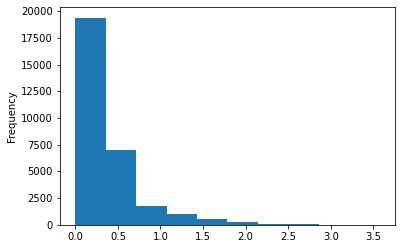

In [10]:
ax = df['living_to_lot'].plot.hist()

<AxesSubplot:>

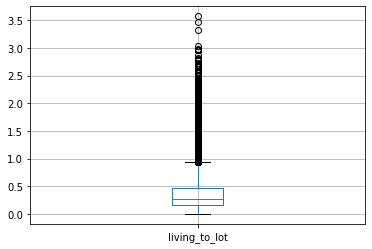

In [11]:
df.boxplot(column='living_to_lot')

### Sqft_Unused

In [12]:
df['sqft_unused'] = df['sqft_lot'] - df['sqft_living']

In [13]:
df['sqft_unused'].mask(df['sqft_unused'] < 0, 0, inplace=True)

<AxesSubplot:ylabel='Frequency'>

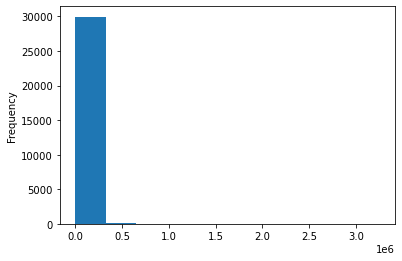

In [14]:
df['sqft_unused'].plot.hist()

### Bed:Bath Ratio

#### First, let's examine bedrooms & bathrooms. Possibly categorical or numeric?

In [15]:
print(df['bedrooms'].value_counts())

df['bathrooms'].value_counts()

3     12746
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64


2.50     8471
2.00     7343
1.00     4556
3.00     4116
3.50     2264
1.50     1807
4.00      645
4.50      531
5.00      145
5.50      102
6.00       45
0.00       25
6.50       25
7.50       12
7.00       12
0.50        5
9.50        2
8.00        2
8.50        1
10.00       1
10.50       1
Name: bathrooms, dtype: int64

<font color='maroon'> How can you have zero bathrooms? Ask & drop for now</font>

In [16]:
zero_bathroom_df = df.loc[df['bathrooms'] == 0] #In case we want to explore later
df = df[df['bathrooms'] != 0]

df.info()

print(f"Removed {30111 - 30086} rows due to zero bathrooms.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30086 non-null  float64
 1   bedrooms       30086 non-null  int64  
 2   bathrooms      30086 non-null  float64
 3   sqft_living    30086 non-null  int64  
 4   sqft_lot       30086 non-null  int64  
 5   floors         30086 non-null  float64
 6   waterfront     30086 non-null  object 
 7   greenbelt      30086 non-null  object 
 8   nuisance       30086 non-null  object 
 9   view           30086 non-null  object 
 10  condition      30086 non-null  object 
 11  grade          30086 non-null  object 
 12  heat_source    30086 non-null  object 
 13  sewer_system   30086 non-null  object 
 14  sqft_basement  30086 non-null  int64  
 15  sqft_garage    30086 non-null  int64  
 16  sqft_patio     30086 non-null  int64  
 17  yr_built       30086 non-null  int64  
 18  yr_ren

In [17]:
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']

In [18]:
df['bed_bath_ratio'].value_counts().sort_index()

#df.boxplot(column='bed_bath_ratio')

0.00     18
0.22      1
0.29      1
0.33      1
0.40      8
       ... 
3.50      5
4.00    360
5.00     41
6.00      2
8.00      2
Name: bed_bath_ratio, Length: 67, dtype: int64

<AxesSubplot:ylabel='Frequency'>

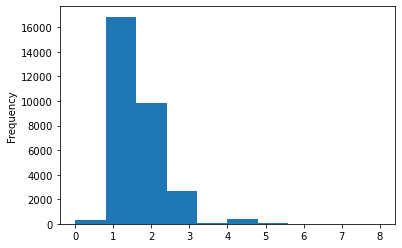

In [19]:
df['bed_bath_ratio'].plot.hist()

## Transform to Binary Variables

### View_Binary

In [20]:
view_coding_before = list(df['view'].value_counts().index)
view_coding_after = [0, 1, 1, 1, 1]

df['view_binary'] = df['view'].replace(to_replace = view_coding_before, value = view_coding_after)

In [21]:
df['view_binary'].value_counts()

0    26532
1     3554
Name: view_binary, dtype: int64

In [22]:
df.drop('view', axis=1, inplace=True)

### Yr Renovated --> Renovated (Binary)

In [23]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

df['renovated'].value_counts()

0    28718
1     1368
Name: renovated, dtype: int64

In [24]:
df.drop('yr_renovated', axis=1, inplace=True)

## Sewer System

In [25]:
sewer_var_before = ['PUBLIC', 'PRIVATE', 'PRIVATE RESTRICTED', 'PUBLIC RESTRICTED']
sewer_var_after = [1, 0, 0, 1]

df['sewer_sys_bin'] = df['sewer_system'].replace(sewer_var_before, sewer_var_after)

df['sewer_sys_bin'].value_counts() # 0 = Private, 1 = Public

df.drop('sewer_system', axis=1, inplace=True)

In [26]:
df.info()

df.sewer_sys_bin.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           30086 non-null  float64
 1   bedrooms        30086 non-null  int64  
 2   bathrooms       30086 non-null  float64
 3   sqft_living     30086 non-null  int64  
 4   sqft_lot        30086 non-null  int64  
 5   floors          30086 non-null  float64
 6   waterfront      30086 non-null  object 
 7   greenbelt       30086 non-null  object 
 8   nuisance        30086 non-null  object 
 9   condition       30086 non-null  object 
 10  grade           30086 non-null  object 
 11  heat_source     30086 non-null  object 
 12  sqft_basement   30086 non-null  int64  
 13  sqft_garage     30086 non-null  int64  
 14  sqft_patio      30086 non-null  int64  
 15  yr_built        30086 non-null  int64  
 16  living_to_lot   30086 non-null  float64
 17  sqft_unused     30086 non-null 

1    25747
0     4339
Name: sewer_sys_bin, dtype: int64

## Sqft_Basement to Basement (Y/N)

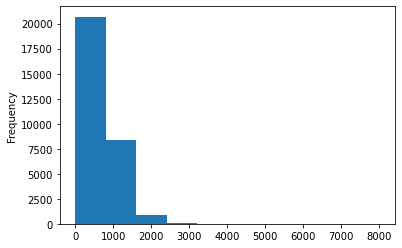

In [27]:
df['sqft_basement'].plot.hist()

df['sqft_basement'].value_counts().sort_values() # So many 0s --> binary makes sense

df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)



In [28]:
df['basement'].value_counts()

df.drop('sqft_basement', axis=1, inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           30086 non-null  float64
 1   bedrooms        30086 non-null  int64  
 2   bathrooms       30086 non-null  float64
 3   sqft_living     30086 non-null  int64  
 4   sqft_lot        30086 non-null  int64  
 5   floors          30086 non-null  float64
 6   waterfront      30086 non-null  object 
 7   greenbelt       30086 non-null  object 
 8   nuisance        30086 non-null  object 
 9   condition       30086 non-null  object 
 10  grade           30086 non-null  object 
 11  heat_source     30086 non-null  object 
 12  sqft_garage     30086 non-null  int64  
 13  sqft_patio      30086 non-null  int64  
 14  yr_built        30086 non-null  int64  
 15  living_to_lot   30086 non-null  float64
 16  sqft_unused     30086 non-null  int64  
 17  bed_bath_ratio  30086 non-null 

## Convert binary object variables to numeric

In [30]:
# Waterfront, Greenbelt, Nuisance

code_dict = {'NO':0, 'YES':1}
df['waterfront'].replace(code_dict, None, inplace=True)
df['greenbelt'].replace(code_dict, None, inplace=True)
df['nuisance'].replace(code_dict, None, inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           30086 non-null  float64
 1   bedrooms        30086 non-null  int64  
 2   bathrooms       30086 non-null  float64
 3   sqft_living     30086 non-null  int64  
 4   sqft_lot        30086 non-null  int64  
 5   floors          30086 non-null  float64
 6   waterfront      30086 non-null  int64  
 7   greenbelt       30086 non-null  int64  
 8   nuisance        30086 non-null  int64  
 9   condition       30086 non-null  object 
 10  grade           30086 non-null  object 
 11  heat_source     30086 non-null  object 
 12  sqft_garage     30086 non-null  int64  
 13  sqft_patio      30086 non-null  int64  
 14  yr_built        30086 non-null  int64  
 15  living_to_lot   30086 non-null  float64
 16  sqft_unused     30086 non-null  int64  
 17  bed_bath_ratio  30086 non-null 

## Separate Possible Predictors: Numeric, Cat_Dum, and Cat_Bin

In [32]:
numeric_index = [0,3,4]

for i in range(12, 18):
    numeric_index.append(i)

numeric_index 

numeric_df = df.iloc[:, numeric_index]

numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           30086 non-null  float64
 1   sqft_living     30086 non-null  int64  
 2   sqft_lot        30086 non-null  int64  
 3   sqft_garage     30086 non-null  int64  
 4   sqft_patio      30086 non-null  int64  
 5   yr_built        30086 non-null  int64  
 6   living_to_lot   30086 non-null  float64
 7   sqft_unused     30086 non-null  int64  
 8   bed_bath_ratio  30086 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 2.3 MB


In [33]:
need_dummy_var = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'heat_source']
binary_var = ['waterfront', 'greenbelt', 'nuisance', 'view_binary', 'renovated', 'sewer_sys_bin', 'basement']

need_dummy_df = df.loc[:, need_dummy_var]
binary_df = df.loc[:, binary_var]

need_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     30086 non-null  int64  
 1   bathrooms    30086 non-null  float64
 2   floors       30086 non-null  float64
 3   condition    30086 non-null  object 
 4   grade        30086 non-null  object 
 5   heat_source  30086 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ MB


In [34]:
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   waterfront     30086 non-null  int64
 1   greenbelt      30086 non-null  int64
 2   nuisance       30086 non-null  int64
 3   view_binary    30086 non-null  int64
 4   renovated      30086 non-null  int64
 5   sewer_sys_bin  30086 non-null  int64
 6   basement       30086 non-null  int64
dtypes: int64(7)
memory usage: 1.8 MB


In [35]:
len(df.columns) == len(binary_df.columns) + len(need_dummy_df.columns) + len(numeric_df.columns)

True

## Concatenate df in this order to make it easier

In [39]:
cols = []

cols = list(numeric_df.columns) + list(binary_df.columns) + list(need_dummy_df.columns)

df = df.reindex(columns=cols)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           30086 non-null  float64
 1   sqft_living     30086 non-null  int64  
 2   sqft_lot        30086 non-null  int64  
 3   sqft_garage     30086 non-null  int64  
 4   sqft_patio      30086 non-null  int64  
 5   yr_built        30086 non-null  int64  
 6   living_to_lot   30086 non-null  float64
 7   sqft_unused     30086 non-null  int64  
 8   bed_bath_ratio  30086 non-null  float64
 9   waterfront      30086 non-null  int64  
 10  greenbelt       30086 non-null  int64  
 11  nuisance        30086 non-null  int64  
 12  view_binary     30086 non-null  int64  
 13  renovated       30086 non-null  int64  
 14  sewer_sys_bin   30086 non-null  int64  
 15  basement        30086 non-null  int64  
 16  bedrooms        30086 non-null  int64  
 17  bathrooms       30086 non-null 

# Visualizing Variables

## Histograms of Continuous Variables

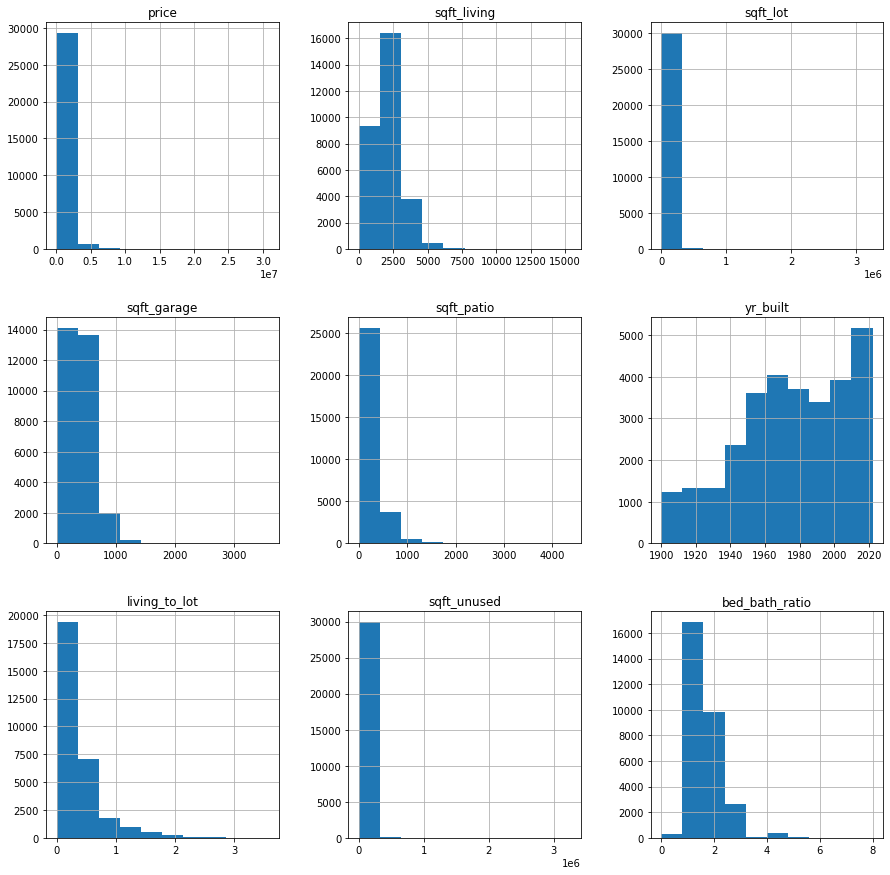

In [48]:
numeric_df.hist(figsize=(15,15));

<font color='blue'>Every Variable very Skewed to the Left, except for year_built (Skewed right) </font>

<font size = +2><font color='red'>Transformations may be necessary </font></font>

***

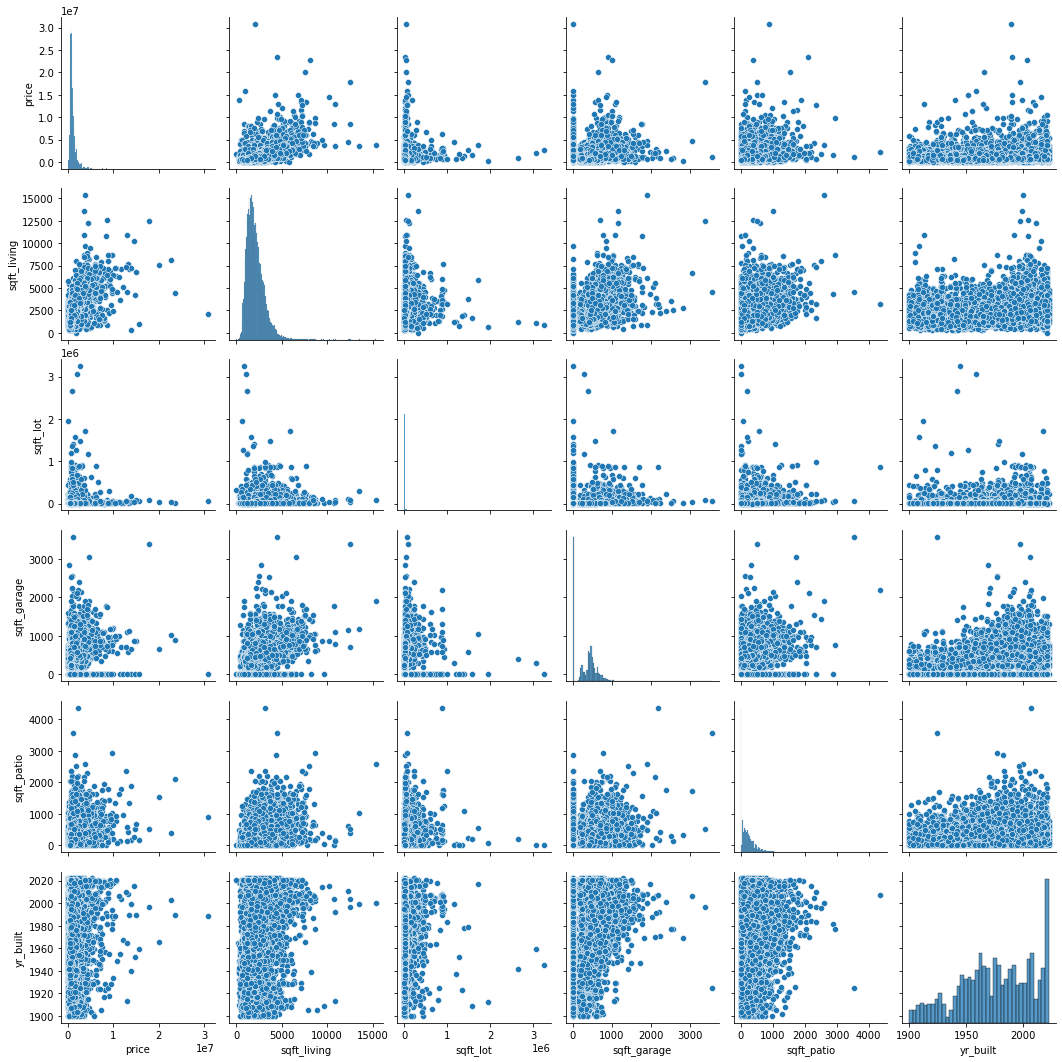

In [76]:
sns.pairplot(df.iloc[:,0:6])

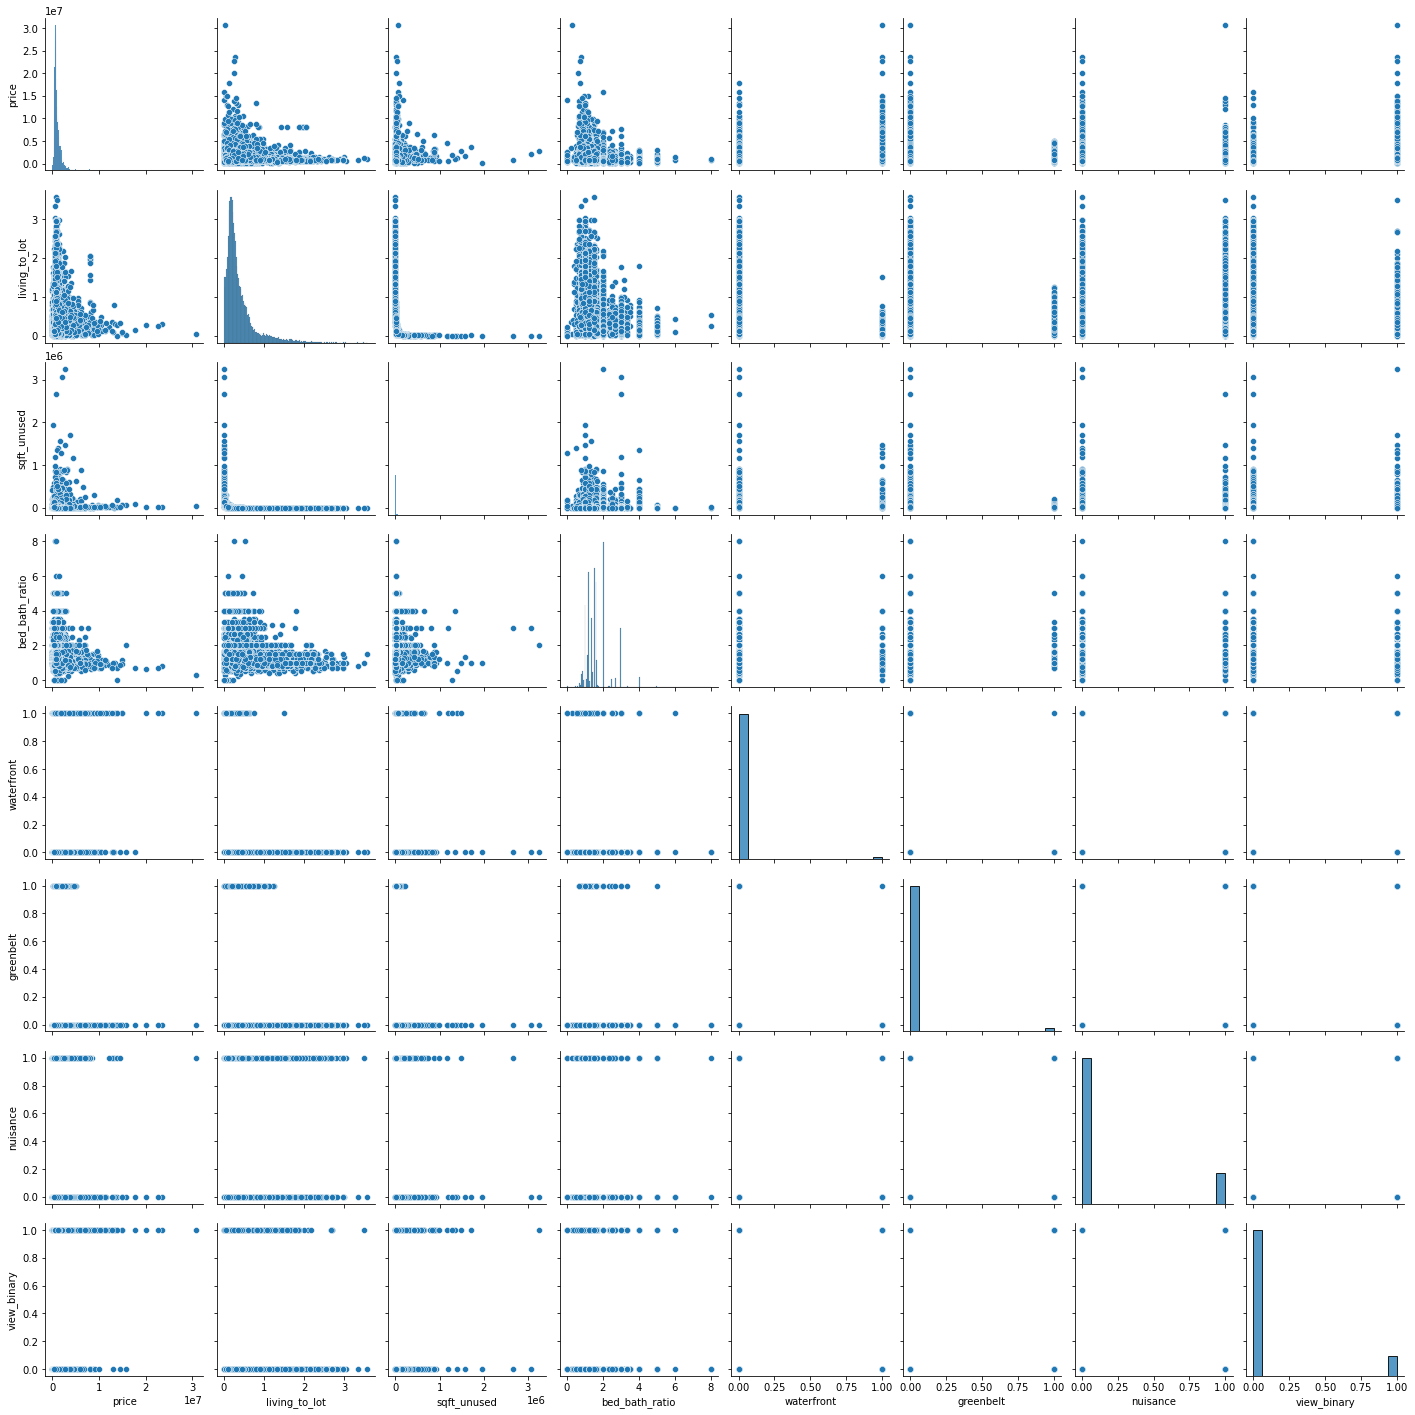

In [75]:
plot2_list = [x for x in range(6, 12)]

plot2_list.append(0)

plot2_list.sort()

sns.pairplot(df.iloc[:,plot2_list])

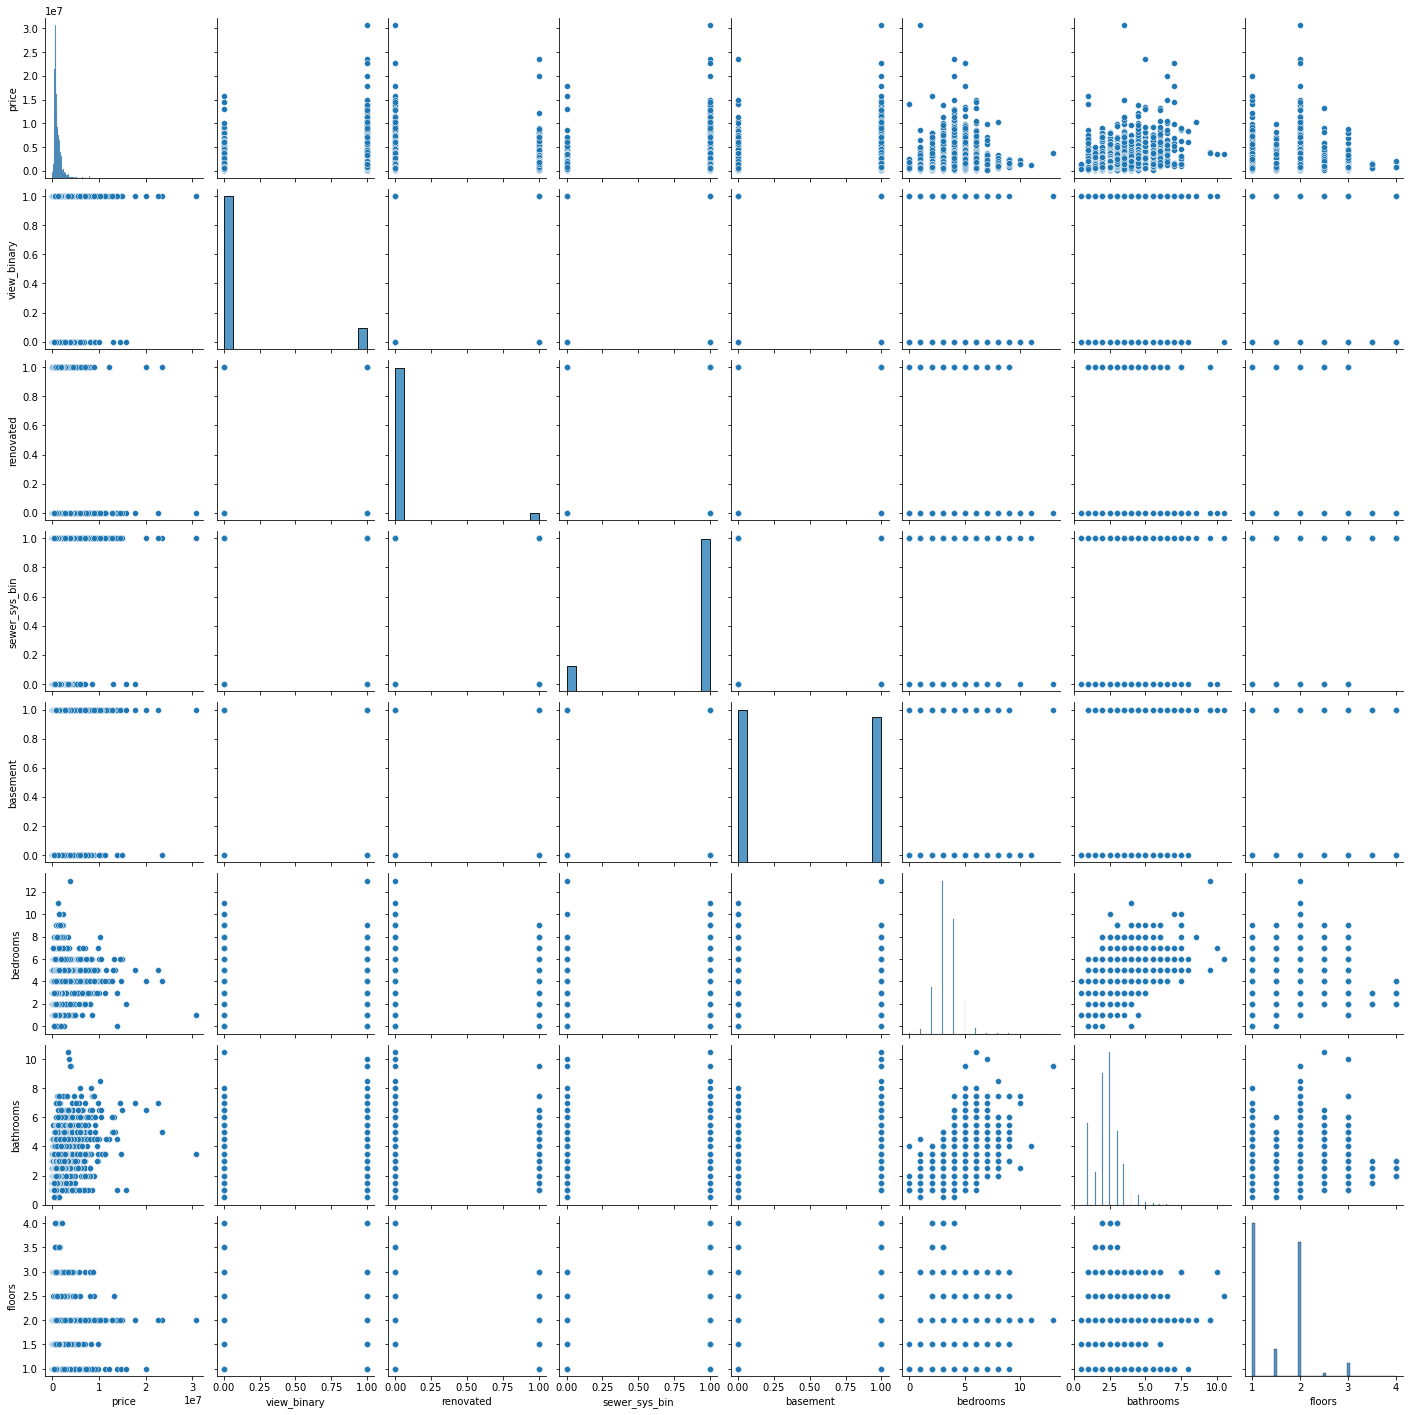

In [77]:
plot3_list = [x for x in range(12,20)]

plot3_list.append(0)

plot3_list.sort()

sns.pairplot(df.iloc[:,plot3_list])

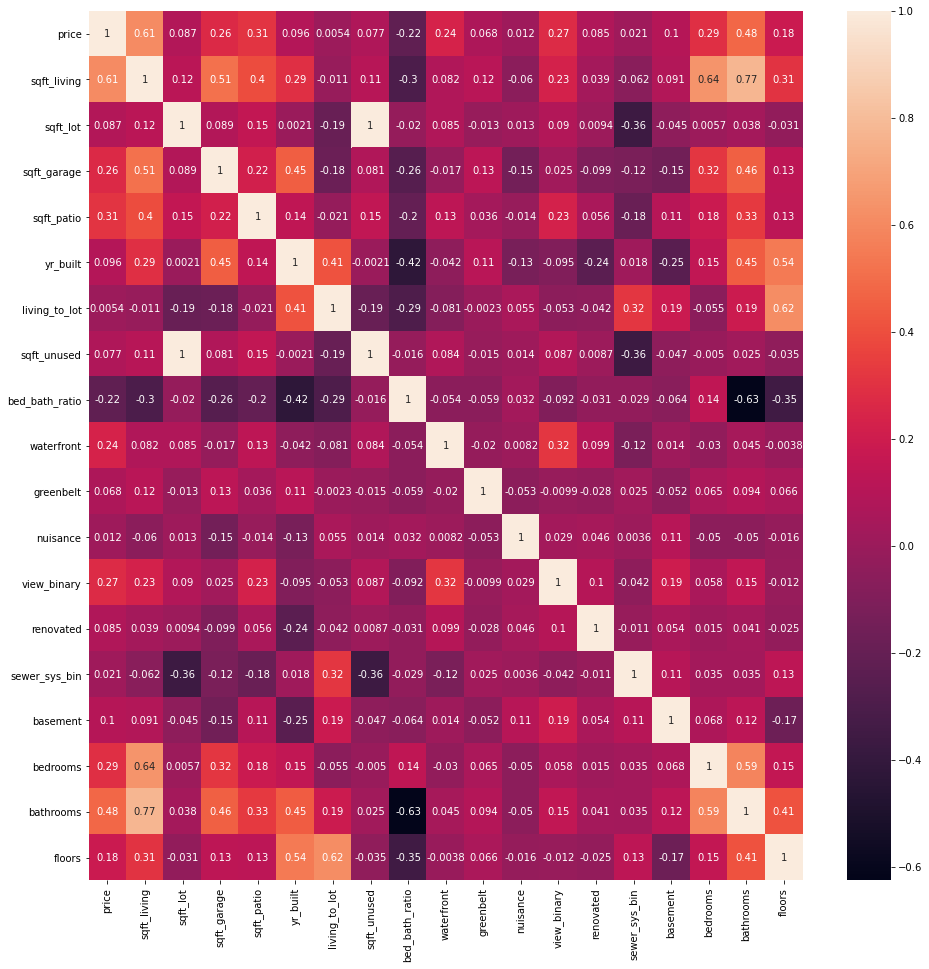

In [50]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot = True);

### Correlations to Watch out For:
1. Sqft_Garage * Bathrooms, Yr Built, Sqft_Living
2. Sqft_Patio * Sqft_Living 
2. Year Built * Living_To_Lot, Sewer_Sys_Bin, Bathrooms, Floors
3. Living_To_Lot * Floors


***
<br>

# 5. First Linear Model (Multiple Regression)

In [99]:
#Get Numeric and Binary Columns for X_Vars

cols = list(numeric_df.columns) + list(binary_df.columns)

cols.pop(0)

print(cols)

X_c = df[cols]

X_c = sm.add_constant(X_vars)

['sqft_living', 'sqft_lot', 'sqft_garage', 'sqft_patio', 'yr_built', 'living_to_lot', 'sqft_unused', 'bed_bath_ratio', 'waterfront', 'greenbelt', 'nuisance', 'view_binary', 'renovated', 'sewer_sys_bin', 'basement']


In [100]:
y = df['price']

In [104]:
model = sm.OLS(y,X_c).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     1541.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:49:14   Log-Likelihood:            -4.4648e+05
No. Observations:               30086   AIC:                         8.930e+05
Df Residuals:                   30070   BIC:                         8.931e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            5.72e+06   3.77e+05     15.174      0.000    4.98e+06    6.46e+06
sqft_living     1064.9583     57.011     18.680      0.000     953.214    1176.703
sqft_lot        -530.1451     55.628     -9.530      0.000    -639.178    -421.112
sqft_garage       21.8735     19.106      1.145      0.252     -15.576      59.323
sqft_patio       231.2338     18.095     12.779      0.000     195.768     266.700
yr_built       -2998.8142    191.187    -15.685      0.000   -3373.548   -2624.080
living_to_lot  -6.338e+04   2.25e+04     -2.813      0.005   -1.08e+05   -1.92e+04
sqft_unused      530.4389     55.621      9.537      0.000     421.419     639.459
bed_bath_ratio -8.442e+04   7382.096    -11.436      0.000   -9.89e+04      -7e+04
waterfront      1.117e+06   3.23e+04     34.599      0.000    1.05e+06    1.18e+06
greenbelt       6.265e+04   2.49e+04      2.512      0.012    1.38e+04    1.12e+05
nuisance        7.549e+04   1.05e+04      7.222      0.000     5.5e+04     9.6e+04
view_binary     1.844e+05   1.35e+04     13.680      0.000    1.58e+05    2.11e+05
renovated       5.203e+04   1.97e+04      2.638      0.008    1.34e+04    9.07e+04
sewer_sys_bin   2.607e+05   1.29e+04     20.138      0.000    2.35e+05    2.86e+05
basement       -3.192e+04   9001.385     -3.546      0.000   -4.96e+04   -1.43e+04
==============================================================================
Omnibus:                    41686.006   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43072419.058
Skew:                           7.568   Prob(JB):                         0.00
Kurtosis:                     187.744   Cond. No.                     8.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Reflections

1. We can remove sqft_garage
2. Need to figure out multicollinearity problem!

# Testing Assumptions

## Linearity

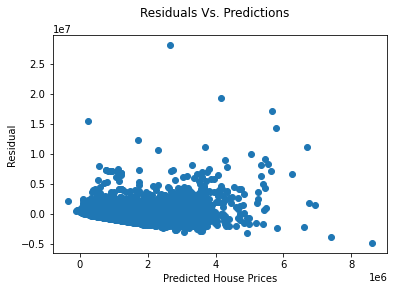

In [107]:
model_preds = model.predict(X_c)
resids = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('Predicted House Prices')
ax.set_ylabel('Residual')
plt.suptitle('Residuals Vs. Predictions');

### Not linear. This is the shape of disappointment

## Errors are Independent

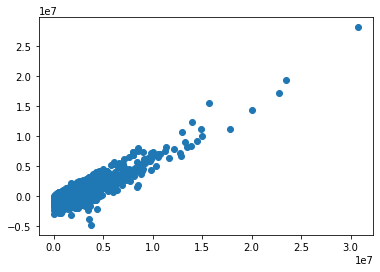

In [108]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

### Very linear, suggests errors are not independent

In [115]:
dw = sm.stats.stattools.durbin_watson

dw(resids)

print(f"{dw(resids):.2f} is less than 2, suggesting positive autocorrelation")

1.85 is less than 2, suggesting positive autocorrelation


## Errors are Normally Distributed

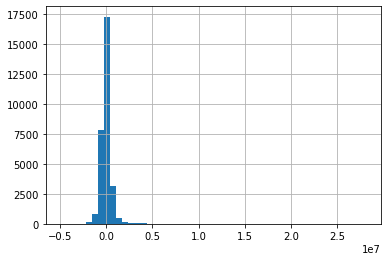

In [116]:
# Histogram of residuals

resids.hist(bins=50);

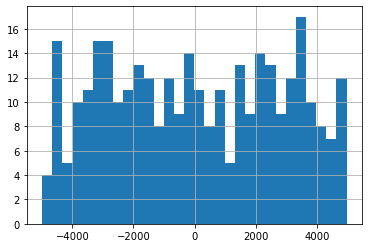

In [117]:
# Residuals histogram without outliers

resids[abs(resids) < 5000].hist(bins=30);

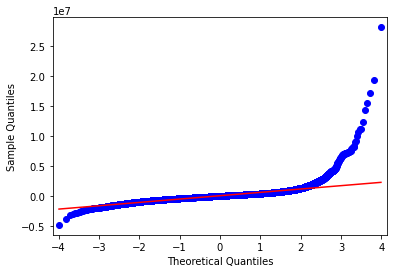

In [118]:
sm.qqplot(resids, line='r');

In [119]:
model.summary().tables[2]

#Omnibus and significant JB mean very skewed/kurtosis, and fails test

Omnibus:,41686.006,Durbin-Watson:,1.846
Prob(Omnibus):,0.000,Jarque-Bera (JB):,43072419.058
Skew:,7.568,Prob(JB):,0.00
Kurtosis:,187.744,Cond. No.,8.49e+06


### Makes sense because everything is skewed to the Left. We could try to transform price

## Homoskedasticity

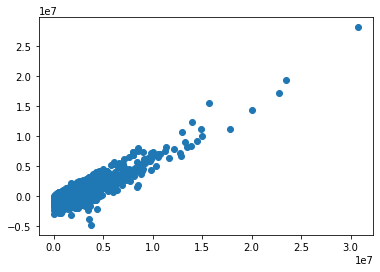

In [120]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

In [122]:
sm.stats.diagnostic.het_breuschpagan(resids, X_vars) #Significiant, suggesting heteroskedasticity

(1050.2386084901057,
 2.283109597671472e-214,
 72.50983716590643,
 2.543197807483866e-218)

In [127]:
sm.stats.diagnostic.het_goldfeldquandt(y, X_vars, drop=0.2)  #Significant

(1.0452705362524364, 0.009548333999359625, 'increasing')

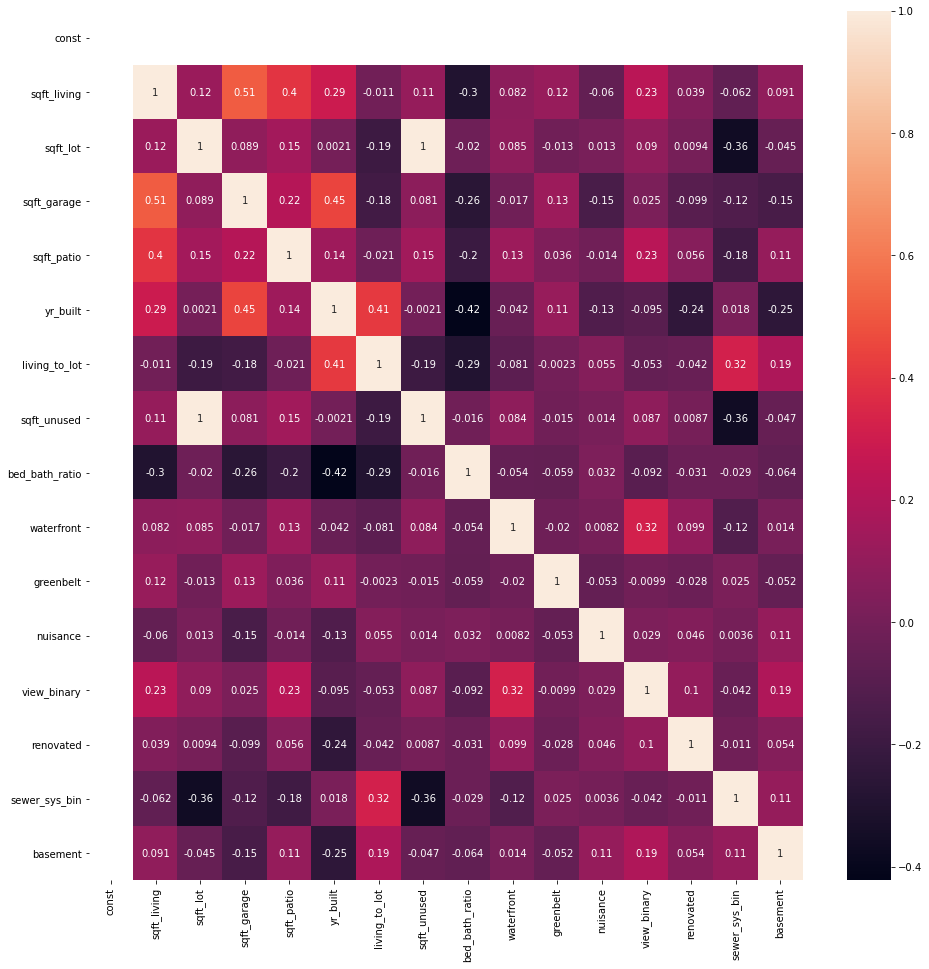

In [132]:
plt.figure(figsize=(16,16))
sns.heatmap(X_vars.corr(), annot = True);

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_vars.columns

vif_data["VIF"] = [variance_inflation_factor(X_vars.values, i)
                          for i in range(len(X_vars.columns))]

vif_data

,feature,VIF
0,const,9397.40
1,sqft_living,203.53
2,sqft_lot,735774.60
3,sqft_garage,1.97
4,sqft_patio,1.30
5,yr_built,2.48
6,living_to_lot,4.67
7,sqft_unused,732699.07
8,bed_bath_ratio,1.38
9,waterfront,1.15


### Very High VIF = sqft_living, sqft_lot, sqft_unused.